# Boosting with trees


# Recap: trees and Random Forest

### Trees: good representation, inaccurate, unstable

### RF: build many different trees through randomization, average them

# Boosting: intuitive idea

### We gradually and iteratively build the overall model as a sum of smaller models called *weak learners*

### Each weak learner seeks to improve the model we have so far

### Weak learners can be any predictive model, most widely used: trees

### How do we capture the notion of *improve the model we have so far*?

# Boosting: overall scheme

1. Initialize $F^{(0)}(x) = 0,\; \forall x$
2. At stage $t \geq 1$:<br>    
    a. Calculate $Y^{(t)} = (y_1^{(t)},\ldots,y_n^{(t)})$ capturing what the model $F^{(t-1)}$ **has not yet explained**<br>
    b. Fit a weak learner $\hat{f}^{(t)}$ to $T^{(t)} = (X,Y^{(t)})$<br>
    c. Update $F^{(t)} = F^{(t-1)} + \epsilon \hat{f}^{(t)}$
    
### Details: How to determine $Y^{(t)}$? Which weak learner to use? What is $\epsilon$?

# Example: Tree boosting for regression

### Defining $Y^{(t)}$ as $y_i^{(t)} = (y_i - F^{(t-1)}(x_i)) $ the current residual (what the model does not explain)

### Weak learner: trees, usually small --- two- or three-level trees as $\hat{f}^{(t)}$

### Make $\epsilon$ as small as possible ($\epsilon$-boosting): tradeoff between accuracy and computation

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
import math
import random

%matplotlib inline

In [5]:
ratings = pd.read_table("http://www.tau.ac.il/~saharon/StatsLearn2018/train_ratings_all.dat", header = None)
ratings[ratings == 0] = None
miss_cong = pd.read_csv("http://www.tau.ac.il/~saharon/StatsLearn2018/train_y_rating.dat", header = None, names = ['score'])
movies = pd.read_csv("http://www.tau.ac.il/~saharon/StatsLearn2018/movie_titles.txt", header = None, names = ['year', 'title'])

X = ratings.values
Y = miss_cong.values[:,0]
n = X.shape[0]
tr_size = math.floor(0.8*n)
te_size = n-tr_size
tr_ind = random.sample(range(n),tr_size)
Ne_Xtr = X[tr_ind,]
Ne_Xte = np.delete(X,tr_ind,0)
Ne_Ytr = Y[tr_ind]
Ne_Yte = np.delete(Y,tr_ind)

In [6]:
Ne_Xtr_noNAN = Ne_Xtr
Ne_Xtr_noNAN[np.isnan(Ne_Xtr_noNAN)]=0
Ne_Xte_noNAN = Ne_Xte
Ne_Xte_noNAN[np.isnan(Ne_Xte_noNAN)]=0

In [21]:
# Boosted trees: depth 2 
ntr = Ne_Xtr.shape[0]
nte = Ne_Xte.shape[0]
tr_err = []
te_err = []
Ytr_now = Ne_Ytr
yhat_tr = np.zeros(ntr)
yhat_te = np.zeros(nte)
eps=0.05
for iter_num in range(200):
    Netree = tree.DecisionTreeRegressor(max_depth=2)
    Netree = Netree.fit(Ne_Xtr_noNAN, Ytr_now)
    yhat_tr_now = Netree.predict(Ne_Xtr_noNAN)
    yhat_te_now = Netree.predict(Ne_Xte_noNAN)
    yhat_tr += eps*yhat_tr_now
    yhat_te += eps*yhat_te_now    
    tr_err.append(math.sqrt(np.sum((yhat_tr-Ne_Ytr)**2)/ntr))
    te_err.append(math.sqrt(np.sum((yhat_te-Ne_Yte)**2)/nte))
    Ytr_now = Ne_Ytr - yhat_tr


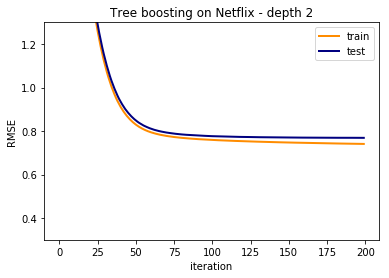

test RMSE: iter 0 3.59  iter 10 2.27  iter 100 0.78  iter 199 0.77


In [22]:
plt.figure()
lw = 2
plt.plot(range(200), tr_err, color='darkorange', lw=lw, label='train' )
plt.plot(range(200), te_err, color='navy', lw=lw, label='test')
plt.ylim([0.3,1.3])
plt.xlabel('iteration')
plt.ylabel('RMSE')
plt.title('Tree boosting on Netflix - depth 2')
plt.legend(loc="upper right")
plt.show() 

print('test RMSE: iter 0',round(te_err[0],2),' iter 10',round(te_err[10],2),' iter 100',round(te_err[100],2),' iter 199',round(te_err[199],2))

In [23]:
# Boosted trees: depth 3 
ntr = Ne_Xtr.shape[0]
nte = Ne_Xte.shape[0]
tr_err = []
te_err = []
Ytr_now = Ne_Ytr
yhat_tr = np.zeros(ntr)
yhat_te = np.zeros(nte)
eps=0.05
for iter_num in range(200):
    Netree = tree.DecisionTreeRegressor(max_depth=3)
    Netree = Netree.fit(Ne_Xtr_noNAN, Ytr_now)
    yhat_tr_now = Netree.predict(Ne_Xtr_noNAN)
    yhat_te_now = Netree.predict(Ne_Xte_noNAN)
    yhat_tr += eps*yhat_tr_now
    yhat_te += eps*yhat_te_now    
    tr_err.append(math.sqrt(np.sum((yhat_tr-Ne_Ytr)**2)/ntr))
    te_err.append(math.sqrt(np.sum((yhat_te-Ne_Yte)**2)/nte))
    Ytr_now = Ne_Ytr - yhat_tr


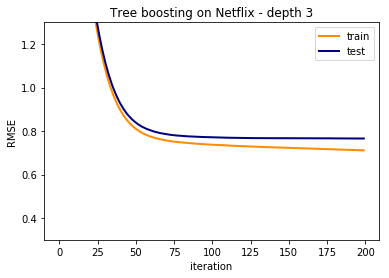

test RMSE: iter 0 3.59  iter 10 2.26  iter 100 0.77  iter 199 0.77


In [24]:
plt.figure()
lw = 2
plt.plot(range(200), tr_err, color='darkorange', lw=lw, label='train' )
plt.plot(range(200), te_err, color='navy', lw=lw, label='test')
plt.ylim([0.3,1.3])
plt.xlabel('iteration')
plt.ylabel('RMSE')
plt.title('Tree boosting on Netflix - depth 3')
plt.legend(loc="upper right")
plt.show() 

print('test RMSE: iter 0',round(te_err[0],2),' iter 10',round(te_err[10],2),' iter 100',round(te_err[100],2),' iter 199',round(te_err[199],2))

In [27]:
# Boosted trees: depth 15 
ntr = Ne_Xtr.shape[0]
nte = Ne_Xte.shape[0]
tr_err = []
te_err = []
Ytr_now = Ne_Ytr
yhat_tr = np.zeros(ntr)
yhat_te = np.zeros(nte)
eps=0.05
for iter_num in range(100):
    Netree = tree.DecisionTreeRegressor(max_depth=15)
    Netree = Netree.fit(Ne_Xtr_noNAN, Ytr_now)
    yhat_tr_now = Netree.predict(Ne_Xtr_noNAN)
    yhat_te_now = Netree.predict(Ne_Xte_noNAN)
    yhat_tr += eps*yhat_tr_now
    yhat_te += eps*yhat_te_now    
    tr_err.append(math.sqrt(np.sum((yhat_tr-Ne_Ytr)**2)/ntr))
    te_err.append(math.sqrt(np.sum((yhat_te-Ne_Yte)**2)/nte))
    Ytr_now = Ne_Ytr - yhat_tr



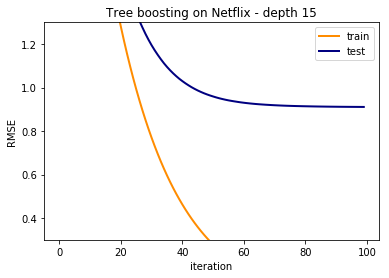

test RMSE: iter 0 3.59  iter 10 2.27  iter 99 0.91


In [29]:
plt.figure()
lw = 2
plt.plot(range(100), tr_err, color='darkorange', lw=lw, label='train' )
plt.plot(range(100), te_err, color='navy', lw=lw, label='test')
plt.ylim([0.3,1.3])
plt.xlabel('iteration')
plt.ylabel('RMSE')
plt.title('Tree boosting on Netflix - depth 15')
plt.legend(loc="upper right")
plt.show() 

print('test RMSE: iter 0',round(te_err[0],2),' iter 10',round(te_err[10],2),' iter 99',round(te_err[99],2))

# A more disciplined view

### For regression, taking the residual as $y_i^{(t)}$  makes sense

### What is an analogy for classification? 

### What about a more rigorous mathematical explanation of what we are doing? 

### There are several approaches of varying mathematical complexity for describing and analyzing boosting

# The additive model view

### Start with a very large (possibly infinite) set of $q$ candidate "weak learners": $h_1(x),...,h_q(x).$

### We are looking for a "linear" model of the form $\hat{f}(x) = \sum_{k=1}^q \hat{\beta}_k h_k(x).$ 

### In boosted trees example the $h_k$'s are *all possible trees of the given depth*

### Since $q$ is huge we cannot directly find a good $\hat{\beta} \in \mathbb R^q.$

# Additive model via boosting


### At each iteration $t$ we find a "good" candidate $h_{k_t}$ and add $\epsilon h_{k_t}$ to the current model

### After $T$ iterations we have a model where $\hat{\beta}_k = \epsilon \times \# \{k_t = k\}$ (the number of times $k$ was chosen)

### How do we define a good $h_{k_t}$ to update its coefficient? 

### One option: given the current model $F^{(t)}$, which $h_k$ improves the model fit the *fastest* when we add it to the model? 

### This can be captured by using the derivative of the loss which measures the fit. Derivative of the RSS (squared loss): 

$$\left.\frac{\partial RSS(F^{(t)})}{\partial \hat{y}_i}\right|_{\hat{y}_i= F^{(t)}(x_i)} = -2 (y_i - F^{(t)}(x_i)).$$

# The gradient boosting paradigm

### Choose a loss function for modeling (like RSS for regression)

### At each iteration: calculate the (negative) gradient of the loss function at the current model, use that as $Y^{(t)}$ for the next weak learner

### Interpretation: trying to find a weak learner $h_{k_t}$ which "behaves like" the negative gradient, which is the direction of *fastest decrease* of the loss

### Can be applied with different loss functions for regression or classification (In the HW -- classification on shirts images)

# Netflix regression boosting through built-in gradient boosting function

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
NeBoost = GradientBoostingRegressor(loss='ls', learning_rate=0.05, n_estimators=200, max_depth=3)
NeBoost = NeBoost.fit(Ne_Xtr_noNAN, Ne_Ytr)

yhat_tr = NeBoost.predict(Ne_Xtr_noNAN)
yhat_te = NeBoost.predict(Ne_Xte_noNAN)

print('200, depth 3: train RMSE',round(math.sqrt(np.sum((yhat_tr-Ne_Ytr)**2)/ntr),2), ' test RMSE',round(math.sqrt(np.sum((yhat_te-Ne_Yte)**2)/nte),2))


200, depth 3: train RMSE 0.71  test RMSE 0.77


# Trees-based Ensembles: Random Forest vs Boosting

### RF: Average trees which are *as different as possible*
1. Randomization is key
2. Big, highly variable trees
3. Average effectively: many trees

### Boosting: Adaptively build additive model over trees
1. Trees should not be too big
2. Learn slowly: Small $\epsilon$, many trees

### Both of them take a bunch of bad predictive models (trees) and combine them into a good model!

# Neural Networks and Deep Learning (DL)

# Neural net: general idea

### A directed graph starting from the features (each coordinate of $x$ is an input node) and ending in the model:

![Alt text](images/nn-small.png "A single layer network (from Wikipedia)")

(From Wikipedia)

[Dynamic illustration](https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6).

# 1-Hidden Layer Neural net

![Alt text](images/nn-tiny.png "A single layer network (from Wikipedia)")
(From Wikipedia)

### Each arc contains a parameter $w_{ij}$ 

### Each node sums its inputs

### Each of $K$ hidden nodes (here $K=4$) applies a non-linear function $\sigma$

$$ \hat{f}(x) = \sum_{k=1}^K w^{(2)}_k \sigma( \sum_{j=1}^p w^{(1)}_{jk} x_j).$$


# Designing a simple Neural net

### How many hidden layers, how many nodes in each?

### Which non-linearity $\sigma$ to use? 

### One or more output nodes? For regression or 2-class classification, usually only one

### Given training data $T$, how do we learn the weights/parameters $W$?

# Gradient descent for parameter learning

### As in other methods, we start from defining a loss function $L(y,\hat{y})$ for learning, for example
1. Squared loss (RSS) for regression, like in OLS or our boosting example
2. Bernoulli log-likelihood (AKA cross-entropy) for classification, like in logistic regression

### Since $\hat{y}_i = \hat{f}(x_i)$ is a function of the parameters $W$, we can write the loss as function of $W$, in our simple example with one hidden layer and squared loss: 

$$ \sum_{i=1}^n L(y_i, \hat{y}_i) = \sum_{i=1}^n \left(y_i - \sum_{k=1}^K w^{(2)}_k \sigma( \sum_{j=1}^p w^{(1)}_{jk} x_{ij})\right)^2$$



# Gradient descent (ctd.)

### Given $W^{(t)}$, we calculate the derivative (gradient) of the loss function relative to every parameter $\nabla L^{(t)}$ 

### Dimension of $\nabla L$ is the number of parameters in our network --- can be millions or billions

### We then take a *downward* step to decrease the loss

$$ W^{(t+1)} = W^{(t)} - \epsilon \nabla L^{(t)}$$

### We repeat that for many iterations


## Two important notions: back-propagation and stochastic gradient descent (SGD)


### A big part of the Neural Nets knowledge-base deals with ways of updating the weights based on gradient which are:
1. Statistically efficient
2. Computationally efficient

### Back-prop is an efficient approach for calculating elements of $\nabla L^{(t)}$ of the form $$\frac{\partial\sum_{i=1}^n L(y_i, \hat{y}_i^{(t)})}{\partial w^{(l)}_{jk}}$$ by taking advantage of the graphical model structure



### SGD uses the idea that:
$$\frac{\partial \sum_{i=1}^n L(y_i, \hat{y}_i)}{\partial w^{(l)}_{jk}} = \sum_{i=1}^n \frac{\partial L(y_i, \hat{y}_i)}{\partial w^{(l)}_{jk}}$$

### SGD calculates the term inside the sum for one observation (or small group of observations) every time, and updates the weights 

### Because the number of weights can be very large, backprop + SGD allow updating all of them with relatively little computation

### Converges much fasterr than calculating $\nabla L$ over all observations before updating


# Trying out NNs --- in recitation

# History of Neural Nets

### Neural nets have been around for decades 

### Initially proposed as "imitating the brain"

### Went in and out of fashion, not the leading choice for predictive modeling as of ~2005

### Starting around 2005: the DL revolution

# From Neural Nets to the DL revolution


### With the explosion of computing power, could fit *much* bigger neural nets, with millions or billions of parameters

### Architectures got more imaginative, like: 
1. Convolutional NNets for images (we will discuss)
2. Recurrent NNs
3. GANS

### Range of problems: reinforcement learning, auto-encoding, transfer learning

### Modern statistical elements: dropout, pooling, momentum,...

### Starting around 2005: amazing accuracy gains in many domains from using DL models

### Fields dominated by DL today: image recognition, speech recognition, natural language preocessing,...